In [1]:
!pip install neologdn

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [10]:
import os

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
from nltk.corpus import stopwords

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
from nltk.stem.wordnet import WordNetLemmatizer

In [15]:
wnl = WordNetLemmatizer()

In [16]:
import neologdn


In [17]:
data = pd.read_csv("Dataset.csv")

In [18]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [19]:
data.rename(columns={'Data': 'Date', 'Genre': 'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)


In [20]:
print(data.columns)

Index(['Date', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description'],
      dtype='object')


In [21]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [22]:
data.Date = pd.to_datetime(data.Date)

In [23]:
year_feature = []

In [24]:
month_feature = []

In [25]:
day_feature = []

In [26]:
weekday_feature = []

In [27]:
for i in range(0,len(data.Date)):
    _year, _month, _day, _weekday = data.Date.iloc[i].year, data.Date.iloc[i].month, data.Date.iloc[i].day, data.Date.iloc[i].weekday_name
    year_feature.append(_year)
    month_feature.append(_month)
    day_feature.append(_day)
    weekday_feature.append(_weekday)

D:\WisenProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [28]:
data['Year'] = year_feature

In [29]:
data['Month'] = month_feature

In [30]:
data['Day'] = day_feature

In [31]:
data['Weekday'] = weekday_feature

In [32]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday


In [33]:
stop_words = stopwords.words('english')

In [34]:
stop_words.extend(["cm", "kg", "mr", "wa" ,"nv", "ore", "da", "pm", "am", "cx"])

In [35]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
def text_preprocessor(document):
    #convert all characters to lowercase
    lowered = document.lower()
    normalized = neologdn.normalize(lowered)
    tokenized = word_tokenize(normalized)
    wnl = WordNetLemmatizer()
    lemmas = list(map(wnl.lemmatize, tokenized))
    
    alphas = [w for w in lemmas if w.isalpha()]
    # remove stopwords
    removed_stops = [r for r in alphas if r not in stop_words]
    return removed_stops

In [37]:
docs = np.array(data["Description"])
docs_without_stopwords = []
for doc in docs:
    
    doc_without_stopwords = " ".join(text_preprocessor(doc))
    docs_without_stopwords.append(doc_without_stopwords)
vec_tfidf = TfidfVectorizer(max_df=1.0, min_df=1, max_features=100, norm='l2', stop_words='english', lowercase=True, use_idf=True)
X = vec_tfidf.fit_transform(docs_without_stopwords)


print('Vocabulary size: {}'.format(len(vec_tfidf.vocabulary_)))
print('Vocabulary content: {}'.format(vec_tfidf.vocabulary_))

Vocabulary size: 100
Vocabulary content: {'drill': 24, 'maintenance': 54, 'support': 85, 'mechanic': 56, 'end': 27, 'equipment': 28, 'hand': 39, 'bar': 7, 'moment': 61, 'slide': 81, 'point': 72, 'finger': 32, 'drilling': 25, 'pump': 74, 'area': 4, 'immediately': 45, 'use': 91, 'level': 53, 'collaborator': 20, 'work': 98, 'hitting': 42, 'rock': 79, 'safety': 80, 'left': 51, 'foot': 34, 'causing': 16, 'injury': 48, 'approximately': 3, 'bolt': 11, 'assistant': 6, 'platform': 71, 'key': 50, 'circumstance': 18, 'company': 21, 'performed': 65, 'weight': 97, 'fall': 31, 'meter': 60, 'hit': 41, 'right': 78, 'worker': 99, 'described': 23, 'truck': 89, 'performing': 66, 'hose': 44, 'caused': 15, 'report': 77, 'ground': 38, 'small': 82, 'technician': 87, 'belt': 8, 'employee': 26, 'face': 30, 'operator': 64, 'height': 40, 'pipe': 68, 'cleaning': 19, 'medical': 57, 'center': 17, 'inside': 49, 'generating': 36, 'moving': 63, 'water': 95, 'leg': 52, 'event': 29, 'material': 55, 'remove': 76, 'using'

In [38]:
tfs = pd.DataFrame(X.toarray(), columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
feature_df = pd.concat([data, tfs], axis=1)
feature_df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,...,TFIDF_upper,TFIDF_use,TFIDF_used,TFIDF_using,TFIDF_vehicle,TFIDF_water,TFIDF_wearing,TFIDF_weight,TFIDF_work,TFIDF_worker
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,...,0.0,0.534432,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.215504,0.000000
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.300228,0.000000,0.230563


In [39]:
target_columns = ["Countries", "Local", "Industry Sector", "Accident Level", "Potential Accident Level", "Gender", "Employee type", "Critical Risk"]
for i in range(0, len(feature_df.columns)):
    if feature_df.columns[i] in target_columns:
        print("####### " + data.columns[i] + " #######")
        print(data.iloc[:,i].value_counts())

####### Countries #######
Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64
####### Local #######
Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_11     2
Local_09     2
Name: Local, dtype: int64
####### Industry Sector #######
Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64
####### Accident Level #######
I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64
####### Potential Accident Level #######
IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64
####### Gender #######
Male      403
Female     22
Name: Gender, dtype: int64
####### Employee type #######
Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee type, dtype: int64
####### Critical Risk #######
Others                 

In [40]:
data.pivot_table(index='Month', columns=[ 'Year','Accident Level'], aggfunc='count')["Countries"].head()

Year            2016                      2017                    
Accident Level     I   II  III   IV    V     I   II  III   IV    V
Month                                                             
1               11.0  NaN  NaN  1.0  NaN  22.0  2.0  2.0  1.0  1.0
2               23.0  4.0  2.0  1.0  1.0  19.0  5.0  2.0  4.0  NaN
3               24.0  4.0  3.0  3.0  NaN  13.0  3.0  NaN  NaN  3.0
4               24.0  1.0  3.0  1.0  NaN  20.0  1.0  NaN  2.0  NaN
5               23.0  2.0  NaN  1.0  NaN   9.0  1.0  1.0  3.0  1.0

In [41]:
data_trend = data.pivot_table(index='Month', columns=[ 'Year','Accident Level'], aggfunc='count').replace(np.nan,0)
data_trend["Countries"].head()

Year            2016                      2017                    
Accident Level     I   II  III   IV    V     I   II  III   IV    V
Month                                                             
1               11.0  0.0  0.0  1.0  0.0  22.0  2.0  2.0  1.0  1.0
2               23.0  4.0  2.0  1.0  1.0  19.0  5.0  2.0  4.0  0.0
3               24.0  4.0  3.0  3.0  0.0  13.0  3.0  0.0  0.0  3.0
4               24.0  1.0  3.0  1.0  0.0  20.0  1.0  0.0  2.0  0.0
5               23.0  2.0  0.0  1.0  0.0   9.0  1.0  1.0  3.0  1.0

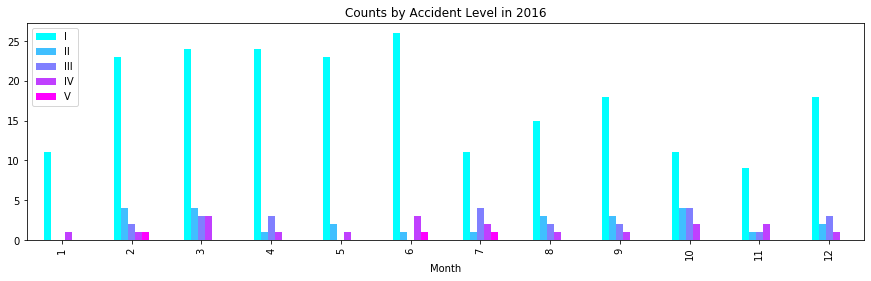

In [42]:
data_trend["Countries"][2016].plot(kind='bar', figsize=(15,4), cmap='cool', title='Counts by Accident Level in 2016')
plt.legend()

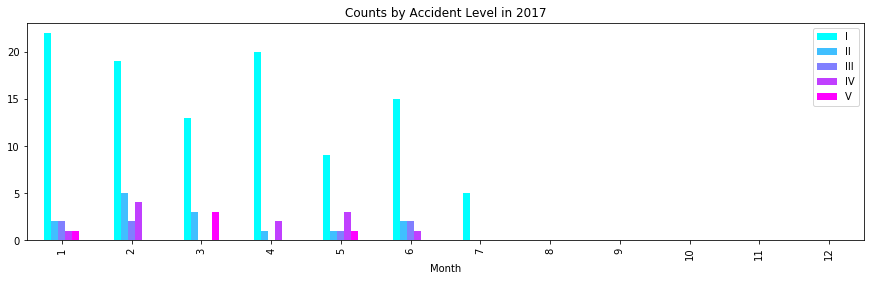

In [43]:
data_trend["Countries"][2017].plot(kind='bar', figsize=(15,4), cmap='cool', title='Counts by Accident Level in 2017')
plt.legend()

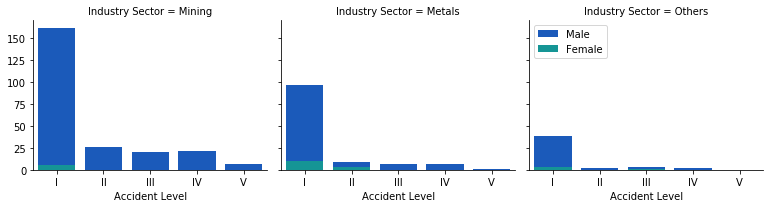

In [44]:
fig=sns.FacetGrid(data, aspect=1.2, palette="winter", hue='Gender', col='Industry Sector', legend_out=True)
fig.map(sns.countplot, 'Accident Level', order={'I':1, 'II':2, 'III':3, 'IV':4, 'V':5})
plt.legend()

In [45]:
model_features = ["Local","Accident Level","Gender","Employee type","Critical Risk","Month","Weekday","TFIDF_assistant","TFIDF_cut","TFIDF_equipment",
                  "TFIDF_face","TFIDF_fall","TFIDF_finger","TFIDF_floor","TFIDF_foot","TFIDF_glove","TFIDF_hand","TFIDF_height","TFIDF_carried","TFIDF_fragment",
                  "TFIDF_weight","TFIDF_drill","TFIDF_cleaning","TFIDF_arm"]
extracted_feature_df = feature_df[model_features]
extracted_feature_df.head()

,Local,Accident Level,Gender,Employee type,Critical Risk,Month,Weekday,TFIDF_assistant,TFIDF_cut,TFIDF_equipment,...,TFIDF_foot,TFIDF_glove,TFIDF_hand,TFIDF_height,TFIDF_carried,TFIDF_fragment,TFIDF_weight,TFIDF_drill,TFIDF_cleaning,TFIDF_arm
0,Local_01,I,Male,Third Party,Pressed,1,Friday,0.000000,0.0,0.13158,...,0.000000,0.0,0.091835,0.0,0.0,0.0,0.000000,0.354478,0.0,0.0
1,Local_02,I,Male,Employee,Pressurized Systems,1,Saturday,0.000000,0.0,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,Local_03,I,Male,Third Party (Remote),Manual Tools,1,Wednesday,0.000000,0.0,0.00000,...,0.287482,0.0,0.161996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,Local_04,I,Male,Third Party,Others,1,Friday,0.150963,0.0,0.00000,...,0.000000,0.0,0.203399,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,Local_04,IV,Male,Third Party,Others,1,Sunday,0.000000,0.0,0.00000,...,0.285572,0.0,0.000000,0.0,0.0,0.0,0.300228,0.000000,0.0,0.0


In [46]:
def lb_enc(df, label):
    le = LabelEncoder()
    le.fit(df[label])
    df[label] = le.transform(df[label])
    return df

In [47]:
enc_target = ["Local","Accident Level","Gender","Employee type","Critical Risk","Weekday"]
for t in enc_target:
    extracted_feature_df = lb_enc(extracted_feature_df,t)
extracted_feature_df.head()

D:\WisenProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Local,Accident Level,Gender,Employee type,Critical Risk,Month,Weekday,TFIDF_assistant,TFIDF_cut,TFIDF_equipment,...,TFIDF_foot,TFIDF_glove,TFIDF_hand,TFIDF_height,TFIDF_carried,TFIDF_fragment,TFIDF_weight,TFIDF_drill,TFIDF_cleaning,TFIDF_arm
0,0,0,1,1,20,1,0,0.000000,0.0,0.13158,...,0.000000,0.0,0.091835,0.0,0.0,0.0,0.000000,0.354478,0.0,0.0
1,1,0,1,0,21,1,2,0.000000,0.0,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,2,0,1,2,15,1,6,0.000000,0.0,0.00000,...,0.287482,0.0,0.161996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,3,0,1,1,16,1,0,0.150963,0.0,0.00000,...,0.000000,0.0,0.203399,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,3,3,1,1,16,1,3,0.000000,0.0,0.00000,...,0.285572,0.0,0.000000,0.0,0.0,0.0,0.300228,0.000000,0.0,0.0


In [48]:
def make_model_and_predict(df):    
    
    y = np.array(df['Accident Level'])
    x = df.drop('Accident Level', axis=1).values
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=123)

    
    model = RandomForestClassifier(n_estimators=300, random_state=0)
    model.fit(x_train, y_train)
    y_score = model.predict(x_test)

    #evaluate results
    print('####################################')
    print('########## Predict Result ##########')
    print('####################################')
    print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
    print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))

    #calculate feature importance
    print('########################################')
    print('########## Feature Importance ##########')
    print('########################################')
    features = [(df.columns[i], v) for i,v in enumerate(model.feature_importances_)]
    features.sort(key=lambda x: x[1], reverse = True)
    for j, item in enumerate(features[:15]):
        print("[{0}] {1}: {2:0.4f}".format(j, item[0], item[1]))

In [49]:
make_model_and_predict(extracted_feature_df)

####################################
########## Predict Result ##########
####################################
Trained on 382 observations and scoring with 43 test samples.
Accuracy: 0.7907
########################################
########## Feature Importance ##########
########################################
[0] Critical Risk: 0.1028
[1] Employee type: 0.1001
[2] TFIDF_glove: 0.0976
[3] Local: 0.0931
[4] Month: 0.0851
[5] TFIDF_fall: 0.0737
[6] Gender: 0.0480
[7] TFIDF_equipment: 0.0402
[8] TFIDF_cut: 0.0366
[9] TFIDF_hand: 0.0325
[10] Weekday: 0.0315
[11] TFIDF_assistant: 0.0297
[12] TFIDF_face: 0.0293
[13] TFIDF_foot: 0.0276
[14] TFIDF_weight: 0.0263
